In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [15]:
# 나이는 평균값 / 선실번호, 중간정착항구는 N으로 결측치 채워줌
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace= True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [16]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64
Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [17]:
# Cabin 열의 첫번째 알파벳 => 선실 등급 나타냄 => 앞 문자만 추출하기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [18]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

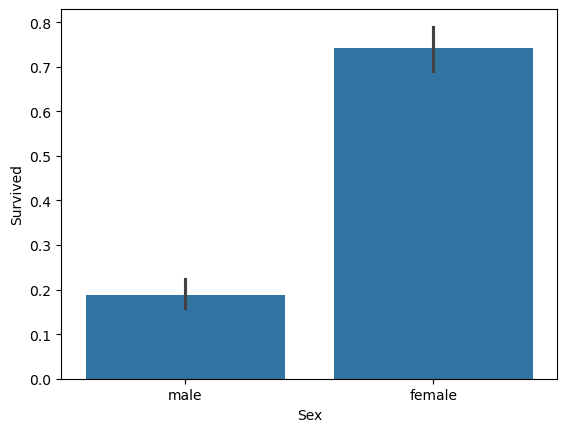

In [19]:
# 성별에 따른 생존자 수 시각화 - Seaborn 사용
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

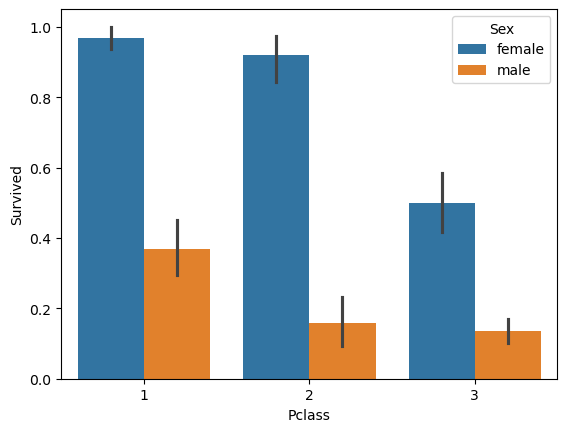

In [21]:
# 객실 등급별 성별에 따른 생존 확률 시각화
# hue : 범례에 사용할 데이터의 열 이름 또는 위치 (정수)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

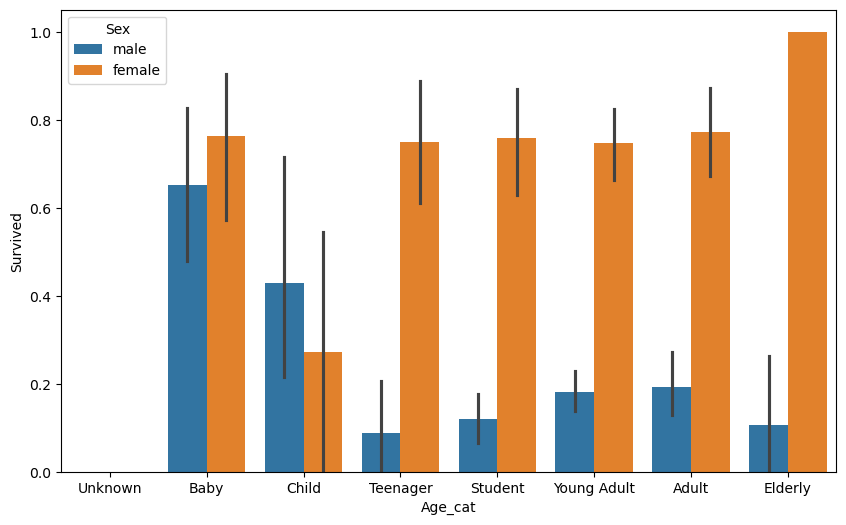

In [22]:
## 나이에 따른 생존 확률 - 나이를 5살 단위로 나누어 분류

# 입력 age에 따라 구분 값을 반환하는 함수 설정  DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age<=5 : cat = 'Baby'
    elif age<=12 : cat = 'Child'
    elif age<=18 : cat = 'Teenager'
    elif age<=25 : cat = 'Student'
    elif age<=35 : cat = 'Young Adult'
    elif age<=60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

# 시각화
# order : 막대 그래프를 그릴 때, x축 값들의 순서
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [23]:
# 문자열 카테고리 피쳐를 숫자형 카테고리 피처로 변환 - 사이킷런 LabelEncoder 이용
from sklearn.preprocessing import LabelEncoder

# encode_frame() 함수 생성 : 데이터를 한번에 변환
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- 지금까지 가공한 내역 정리 및 함수 생성

In [26]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

- 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출

In [27]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 앞서 정의한 데이터 전처리 함수 호출 (결측치 처리 / 머신러닝 알고리즘에 불필요한 피처 제거/ 레이블 인코딩 수행)
X_titanic_df = transform_features(X_titanic_df)

In [28]:
# 학습 데이터 세트를 기반으로 별도의 테스트 데이터 세트 추출 - train_test_split() API 이용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)

#### 타이타닉 생존자 예측
##### - 결정트리, 랜덤 포레스트, 로지스틱 회귀 사용

In [ ]:
# 모델 학습 => fit(X_train, y_train)                  : 트레이닝을 위한 데이터 넣어 학습
# 결과 예측 => predict(X_test)                        : 문제를 넣어 예측
# 모델 평가 => accuracy_score(y_test, X_test_predict) : 정답과 문제(오답) 비교

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear') # solver : 로지스틱 회귀의 최적화 알고리즘 선택 / 작은 데이터셋에서의 이진분류는 liblinear가 성능이 약간 더 좋음

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도 : {accuracy_score(y_test, dt_pred):.4f}')

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier 정확도 : {accuracy_score(y_test, rf_pred):.4f}')

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression     정확도 : {accuracy_score(y_test, lr_pred):.4f}')

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression     정확도 : 0.8659


- 교차 검증으로 결정 트리모델 평가 - model_selection에 있는 KFold 클래스, cross_val_score() 클래스 사용

In [45]:
# KFold 이용 - 폴드 개수 5개
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트가 5개인 KFold 객체 생성, 예측 결과를 폴드 수만큼 저장할 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df),1):
        # X_titanic_df(피쳐, 종속변수) 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f'{iter_count}번째 교차 검증 정확도 : {accuracy:.4f}')

    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score:.4f}')

# 앞서 정의한 exec_kfold 호출
exec_kfold(dt_clf, folds=5)

1번째 교차 검증 정확도 : 0.7542
2번째 교차 검증 정확도 : 0.7809
3번째 교차 검증 정확도 : 0.7865
4번째 교차 검증 정확도 : 0.7697
5번째 교차 검증 정확도 : 0.8202
평균 정확도 : 0.7823


In [46]:
# cross_val_score() API 이용
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
# estimator : 모델을 나타내는 객체 (회귀인지 분류인지 구분) / X : 피쳐 데이터 / y: 타겟 데이터(default = None) / cv : fold의 수 결정

for iter_count, accuracy in enumerate(scores,1):
    print(f'{iter_count}번째 정확도 : {accuracy:.4f}')

print(f'평균 정확도 : {np.mean(scores):.4f}')

1번째 정확도 : 0.7430
2번째 정확도 : 0.7753
3번째 정확도 : 0.7921
4번째 정확도 : 0.7865
5번째 정확도 : 0.8427
평균 정확도 : 0.7879


→ K폴드와 cross_val_score()의 평균 정확도가 다른 이유 : cross_val_score()가 StratifiedKFold를 이용해 폴드세트를 분할하기 때문